# Coding Assignment

Your assignment this week is to fit a function to some experimental data, plot the data and the fitted function, and extract some parameters from the fit. All the information you need to do this is in the Lab 5 notes! This assignment is worth 20 marks, and 2 of these marks will be awarded for good commenting of the code. 

Mike has designed a new gamma-ray detector. He has measured a spectrum of the response of his gamma-ray detector to a specific gamma-ray radiation source. The spectrum is simply a graph of energy (x) vs counts (y) displayed as a "histogram" (i.e. a bar chart).  Mike's spectrum is below, and the data can be found in the attached file "MikeGamma.txt". (You do not need to reproduce this plot - it is for your information only).

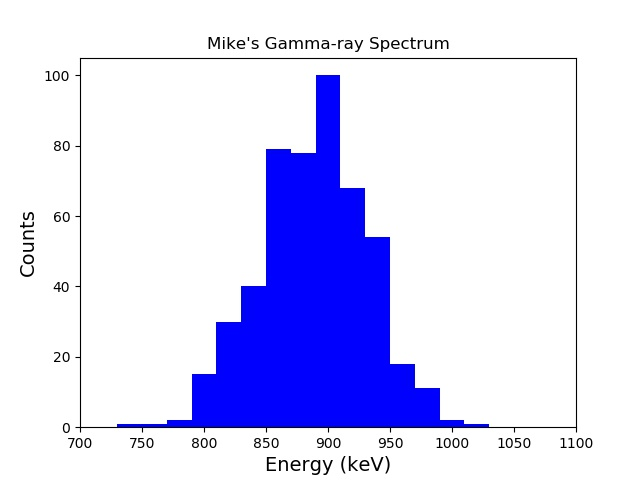

The centre of the distribution should be the energy of the gamma-ray. Mike expects his spectrum to have a gaussian shape. Mike's design criterion is that the width of the peak in keV (known as Full Width at Half Maximum - FWHM) is less than 10% of the energy of the gamma-ray. The equation of the gaussian function is:

$$ y = h \exp\left(\frac{-\left(x-x_m\right)^2}{2\sigma^2}\right) $$

where $h$ is the height, $x_m$ is the centre of the distribuion and $\sigma$ is the standard deviation.  The FWHM of a gaussian shape is given by FWHM = 2.35σ.

## Part 1 

(6 marks). Read the data from the file and plot the data in an x-y plot using matplotlib.

ALL CODE BELOW IS WRITTEN BY MYSELF

[ 740.  760.  780.  800.  820.  840.  860.  880.  900.  920.  940.  960.
  980. 1000. 1020.] [  1.   1.   2.  15.  30.  40.  79.  78. 100.  68.  54.  18.  11.   2.
   1.]


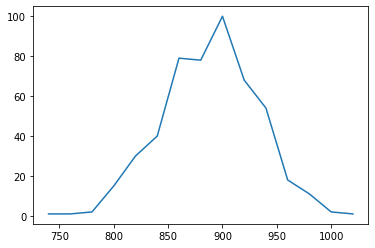

In [1]:
import numpy as np                    # importing all required libraries for these lines of code
import matplotlib.pyplot as plt
dfile = open('MikeGamma.txt','r')     # opens the Mike Gamma text file
 
numlines = sum(1 for line in dfile)
dfile.seek(0)

x = np.zeros(numlines)                # sets an array for one of the axis depending on how many integer points there are
y = np.zeros(numlines)                # sets an array for another one of the axis depending on how many integer points there are
i = 0

while i < numlines:                   # only iterates through the file a set number of times 
    for line in dfile:     
         row = line.strip()           # strips out one line and assigns it to "row"
         column = row.split()         # splits up the string into a list (called column) of items found in that line   
         x[i] = float(column[0])      # appends the numpy array of x
         y[i] = float(column[1])      # appends the numpy array of y
         i += 1                       # increments the i value for the while loop and the index position along the array
print(x,y)

dfile.close()                      # have to close file after reading through and obtaining data

plt.plot(x,y)                         # plots the raw x and y data on each axis
plt.show()


## Part 2 

(8 marks). Use the $\texttt{curve}$_$\texttt{fit}$ function to fit a gaussian curve to the data and extract the three parameters of the fitted gaussian - the height (in counts), the mean energy (in keV) and $\sigma$ (in keV). Has Mike achieved his design criterion? [Hint: dont forget to use $\texttt{np.exp( )}$ rather than $\texttt{exp( )}$ for the guassian - see the Lab 5 notes].  Make a note of your conclusion using a markdown cell.

In [2]:
from scipy.optimize import curve_fit                 # importing all required libraries for these next few lines of code
import numpy as np

def function(x,h,xm,sd):                             # using the function that passes in the x mean value, height, standard deviation and x value in the proper order
    return h*(np.exp(-(x-xm)**2/(2*sd**2)))
 
intg = (100,1000,10)                                 # assigning estimate values for the h, xm and sd
para,covar = curve_fit(function,x,y,p0=intg)         # this is scipy's curve_fit function.
errors = np.sqrt(np.diag(covar))                     # the code finds the errors for the graph's curve
print(para)
print(errors)


[ 91.95721147 890.24657189  43.42623366]
[4.03914076 2.20243284 2.20294854]


Mike expected a gaussian curve which is not seen in part 1. The FWHM is around 130keV. The full gamma ray energy is 300keV which therefore means that his design criteria of less than 10% has not been met. 

## Part 3 

(6 marks). By creating some new arrays, add to your plot a graph of the fitted function, using the parameters you have extracted in Part 2.  [Hint: to make a nice smooth plot use a reasonable number of data points]. 

Your final result should look something like:



A plot of the data points with a plot of the gaussian fit superimposed. 

<b> Note </b>: In this assignment we have not considered the errors on the individial data points. In a real example, this will be important, since these errors will affect the result. There is a simple way of putting the y-errors into an array and including them in the fit. This can be done in curve_fit, and is included in the extension task below. 

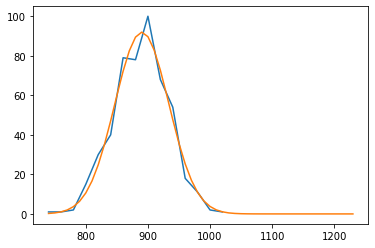

In [3]:
h = 91.95721147              #assigning h, xm and sd from part 2 when they were solved
xm = 890.24657189
sd = 43.42623366

length = 50                  #set value at which the arrays/lists are constructed from 
plt.plot(x,y)                #original set of x and y values need to be plotted first as the x array is changed afterwards

x = np.ones(length)                  #set each value in the array as 1 to then be replaced with the true value
for i in range (0,(length-1)):       #new x array created with a total of 50 index positions
    x[0] = 740                       #since the array was set with 1's, have to change the starting number so that the rest of the values alter respectively
    x[i+1] = x[i]+10                 #each element in the x array has a difference of 10 

n_ay = np.ones(length)            #new "y" array is created to plot the gaussian curve
for i in range (0,50):            #new array has the same set of data values as the x array
    t = h*(np.exp(-((x[i])-xm)**2/(2*sd**2)))
    n_ay[i] *= t
      
plt.plot(x,n_ay)             #plots the new curve with the new x array and y array
plt.show()
